# **Exercise 8 - The Ising Model**

## Question 10.1 - Ising model with Metropolis algorithm

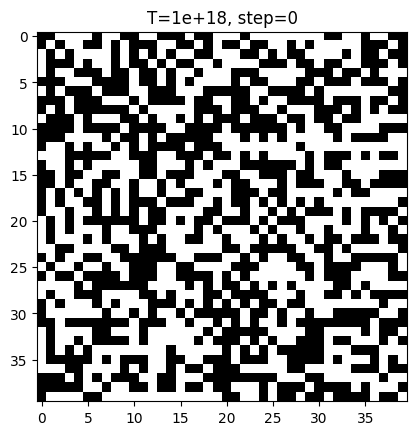

C:\Users\Maryam\AppData\Local\Temp\ipykernel_15280\2960946792.py:27: RuntimeWarning: overflow encountered in exp
  Eexp=np.exp(-beta*Energydifference(k,j,initial,N)) #J=1


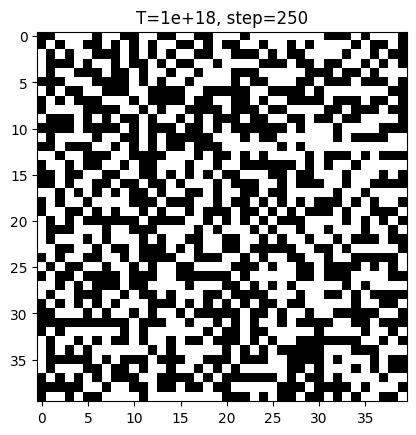

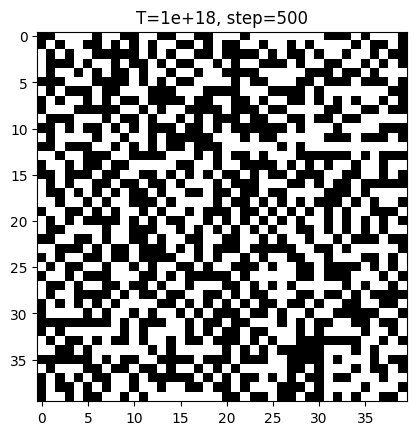

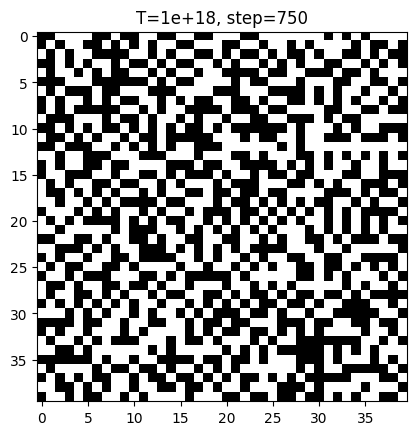

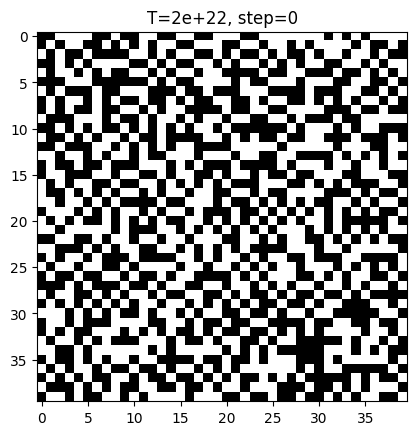

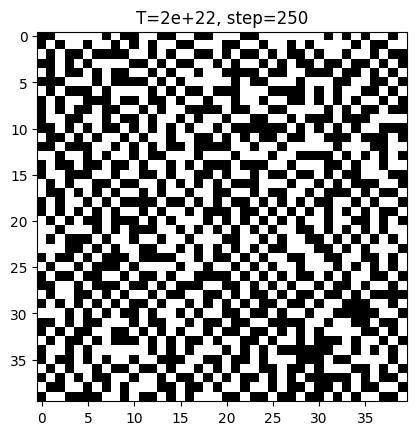

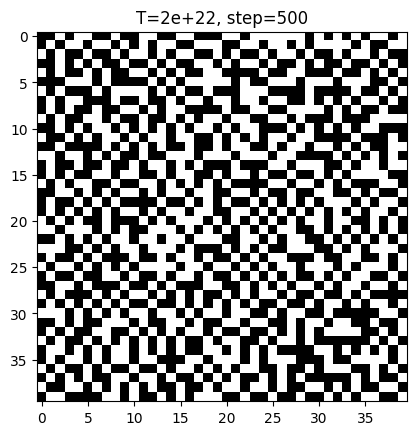

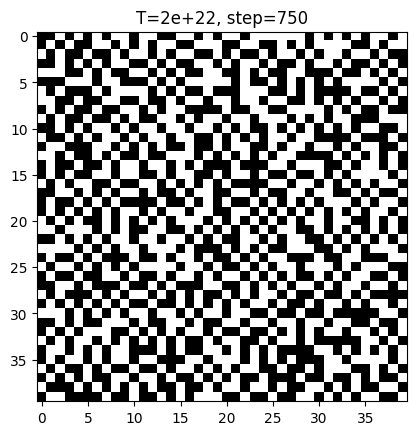

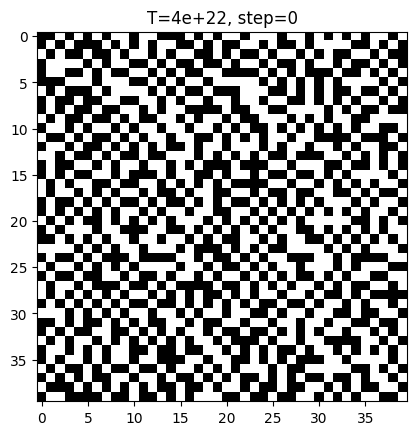

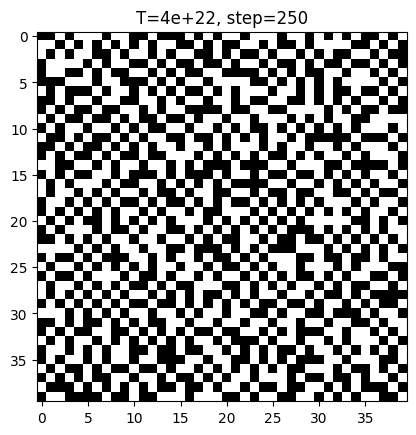

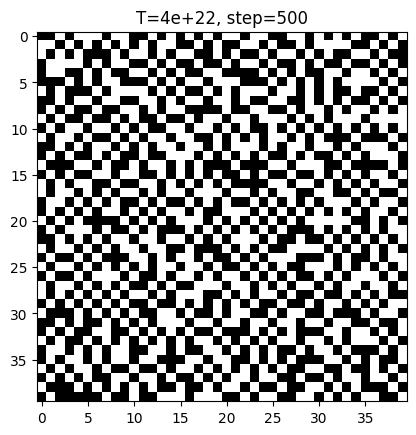

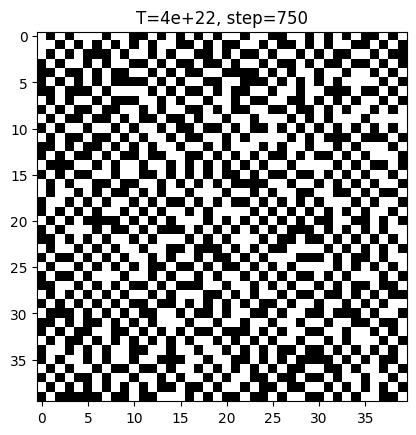

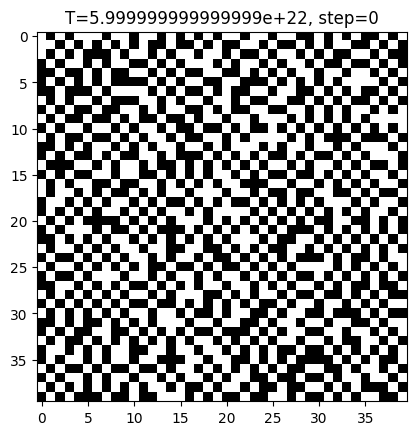

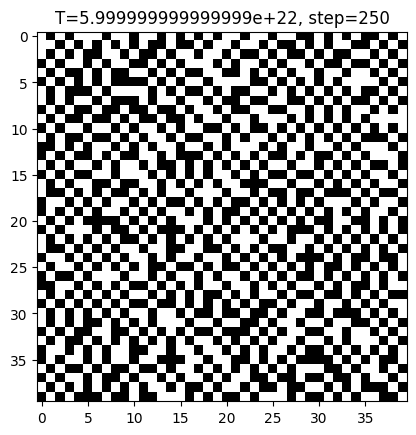

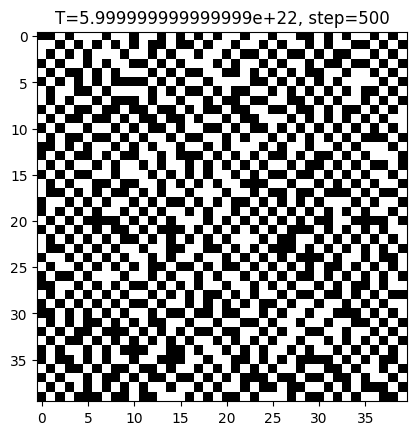

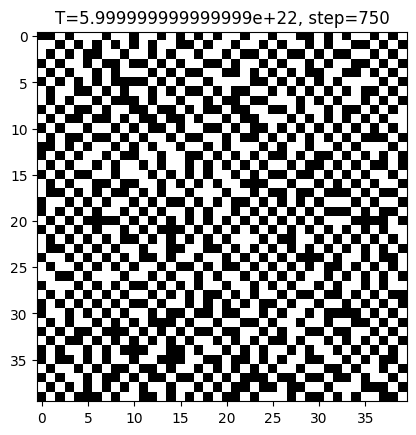

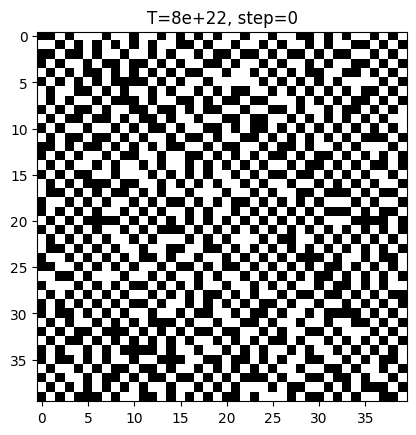

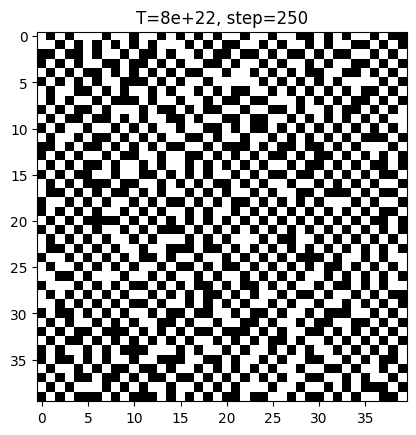

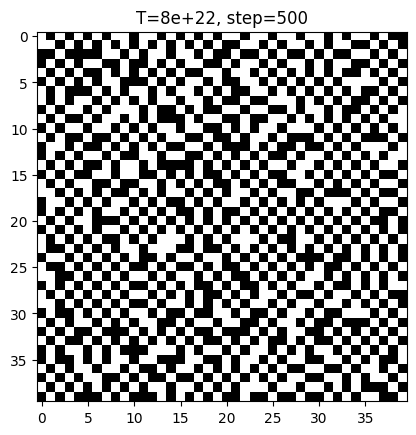

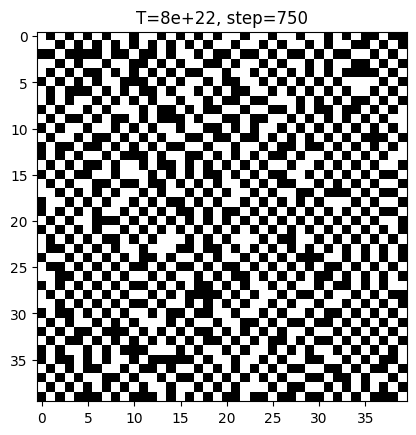

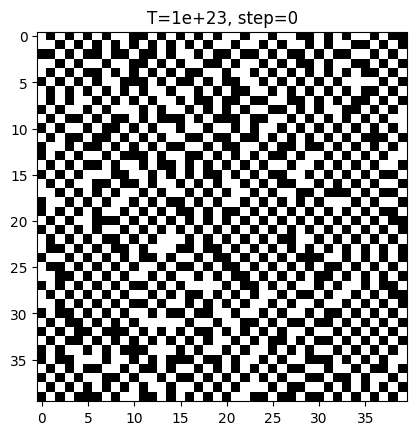

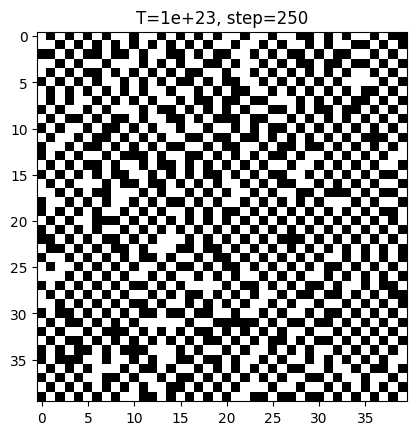

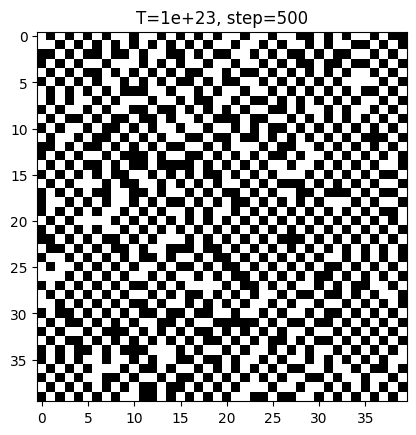

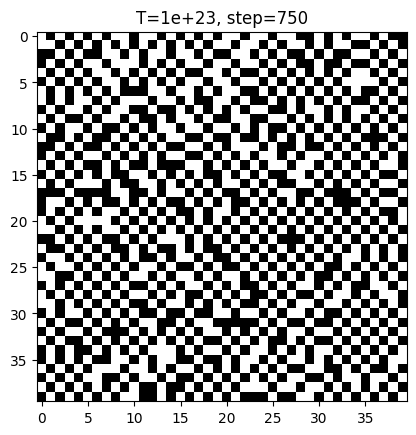

In [5]:
import numpy as np
import matplotlib.pyplot as plt
n=40
s=[1,-1]
initialstate=np.random.choice(s,[n,n])
#plt.imshow(initialstate,cmap="grey")

def Energydifference(i,j,initialstate,N):
    deltaE=-2*initialstate[i%N][j%N]*(initialstate[(i+1)%N][j%N]+initialstate[(i-1)%N][j%N]+initialstate[i%N][(j+1)%N]+initialstate[i%N][(j-1)%N])
    return deltaE

def ising(initial,T,steps,N):
    m=[] # order parameter
    E=0
    energy=[]
    for i in range(N):
        for j in range(N): #initial energy with h=0
            E+=-initialstate[i][j]*initialstate[(i-1)%N][j]
            E+=-initialstate[i][j]*initialstate[i][(j-1)%N]
    energy.append(E)
    for i in range(steps):
        k=np.random.randint(0,N)
        j=np.random.randint(0,N)
        mont=np.random.rand()
        kb=1.380649*10**-23
        beta=1/(kb *T)
        Eexp=np.exp(-beta*Energydifference(k,j,initial,N)) #J=1
        if mont < Eexp: #Mont Carlo condition
            initial[k][j]=-initial[k][j]
            E+=Energydifference(k,j,initialstate,N)
            energy.append(E)
        if i% (steps/4) == 0: #plotting condition
            plt.imshow(initial,cmap="grey")
            plt.title(f"T={T}, step={i}")
            plt.show()
        m.append(abs(np.sum(initial))/(N*N))
    # Compute correlation parameter
    E_cl=0
    for i in range(N):
        for j in range(N):
            E_cl+=initial[i][j]*initial[i][(j+1)%(N)]

# Normalize correlation energy
    E_cl=E_cl/pow(N,2)

    return m ,energy,E_cl,initial

Temp=np.array([0.00001,0.2,.4,.6,.8,1])*10**23
cp=[]
M=[]
cv=[]
X=[]
kb=1.380649*10**-23
for m in Temp:
    A=ising(initialstate,m,1000,n)
    M.append(A[0][-1])
    cv.append(np.var(A[1])/(kb*(m**2)))
    X.append(np.var(A[0])/(kb*(m)))
    cp.append((A[2]-pow(n,2))/np.var(A[3]))

## Question 10.3 - Critacal exponents (𝛽, 𝛾, 𝜈) & system Quantities(|⟨𝑚⟩|, 𝜒, 𝐶𝑣,𝜉)


### **system Quantities(|⟨𝑚⟩|, 𝜒, 𝐶𝑣,𝜉)**

#### |⟨𝑚⟩| (order parameter) vs T

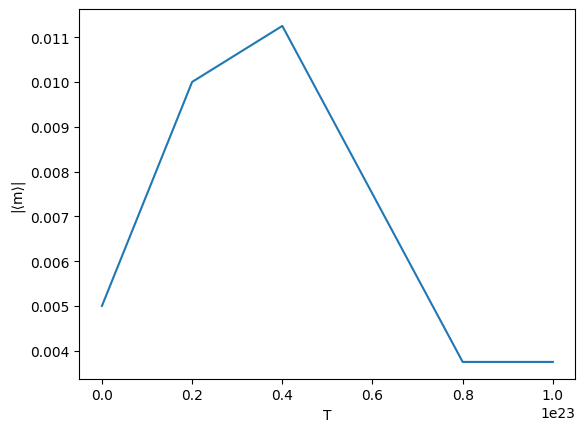

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(Temp, M) 
plt.xlabel('T')
plt.ylabel('|⟨m⟩|')
plt.show()

#### 𝐶𝑣 (heat capacity)  vs T

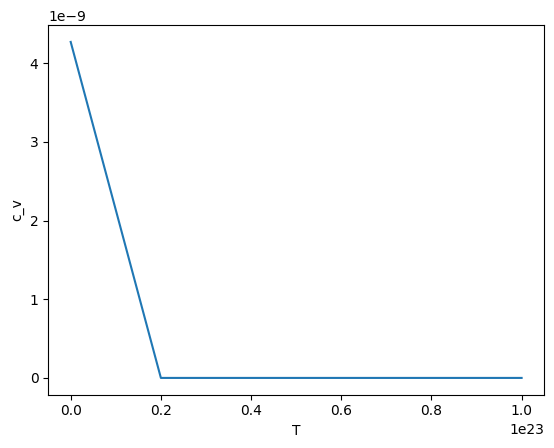

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(Temp, cv) 
plt.xlabel('T')
plt.ylabel('c_v')
plt.show()

#### 𝜒 (magnetic susceptibility) vs T

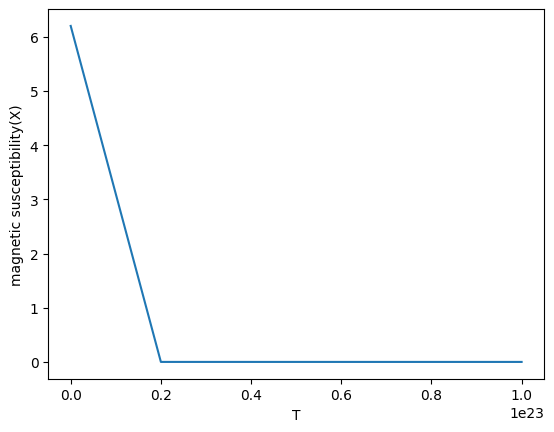

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(Temp, X) 
plt.xlabel('T')
plt.ylabel('magnetic susceptibility(X)')
plt.show()

#### 𝜉 (correlation length) vs T


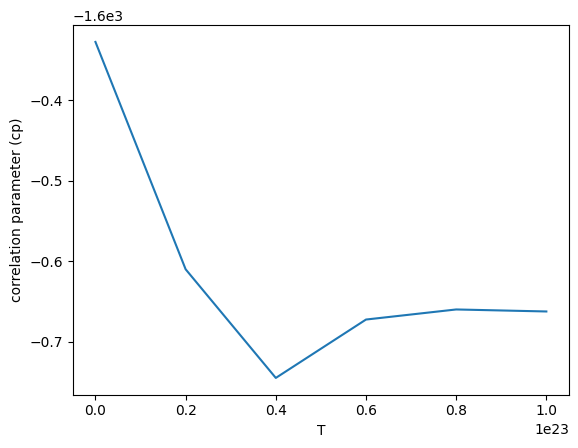

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(Temp, cp) 
plt.xlabel('T')
plt.ylabel('correlation parameter (cp)')
plt.show()

### **Critacal exponent (𝛽, 𝛾, 𝜈)**

In [18]:
# we need Tc(critical temperature) to find these exponents
# J/(Kb*Tc)= 1/2 * ln(1+√2) ___J=1__> Tc=2/(Kb*ln(1+√2)) -> Tc=2/(1.380649*10**-23 * 0.88137358702)=1.644*10**23
Tc=1.644*10**23

#### 𝛽 (relating to Order parameter)

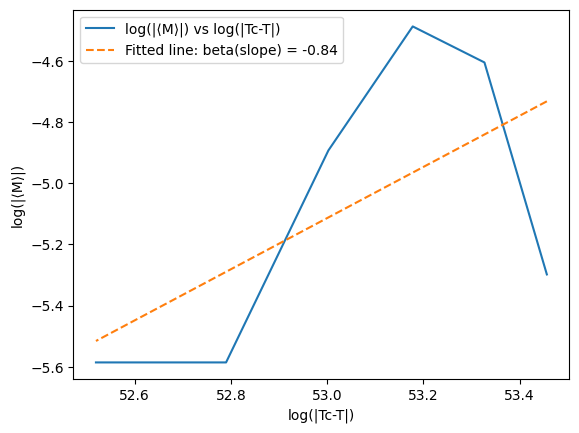

In [19]:
# plotting log(|⟨𝑚⟩|) vs log(T) will give us 𝛽 (because: |⟨𝑚⟩|~|Tc-T|^-𝛽 )

import numpy as np
import matplotlib.pyplot as plt
 
#this part will give us [slope,intercept] as a cofficient of x & y
coefficients = np.polyfit(np.log(Tc-Temp), np.log(M), 1)
slope = coefficients[0]
intercept = coefficients[1]
fittedy = np.polyval(coefficients, np.log(Tc-Temp))


plt.plot(np.log(Tc-Temp), np.log(M), label='log(|⟨M⟩|) vs log(|Tc-T|)')
plt.plot(np.log(Tc-Temp), fittedy, '--', label=f'Fitted line: beta(slope) = -{slope:.2f}')
plt.xlabel('log(|Tc-T|)')
plt.ylabel('log(|⟨M⟩|)')
plt.legend()
plt.show()


#### 𝛾 (relating to magnetic susceptibility) 

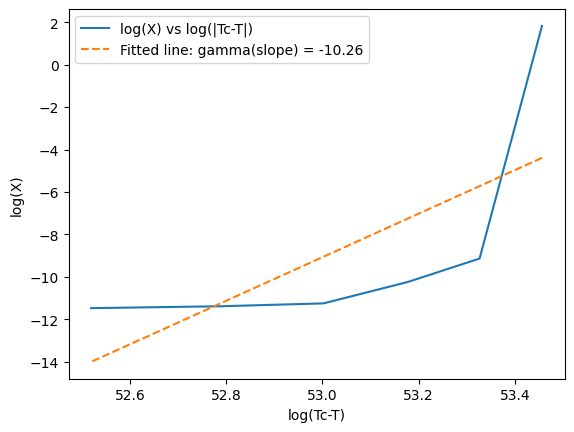

In [20]:
# plotting log(𝜒) vs log(T) will give us 𝛾 (because 𝜒~|Tc-T|^-𝛾)

import numpy as np
import matplotlib.pyplot as plt
 
coefficients = np.polyfit(np.log(Tc-Temp), np.log(X), 1)
slope = coefficients[0]
intercept = coefficients[1]
fittedy = np.polyval(coefficients, np.log(Tc-Temp))


plt.plot(np.log(Tc-Temp), np.log(X), label='log(X) vs log(|Tc-T|)')
plt.plot(np.log(Tc-Temp), fittedy, '--', label=f'Fitted line: gamma(slope) = -{slope:.2f}')
plt.xlabel('log(Tc-T)')
plt.ylabel('log(X)')
plt.legend()
plt.show()

#### 𝜈 (relating to correlation length)

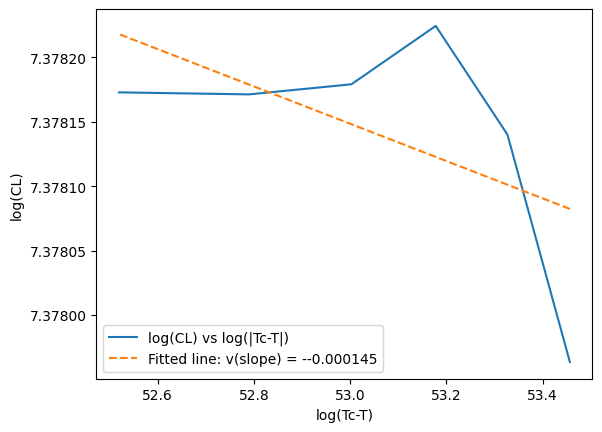

In [21]:
# plotting log(cp) vs log(T) will give us 𝜈 (because 𝜉~|Tc-T|^-𝜈)

import numpy as np
import matplotlib.pyplot as plt
 
coefficients = np.polyfit(np.log(Tc-Temp), np.log(abs(np.array(cp))), 1)
slope = coefficients[0]
intercept = coefficients[1]
fittedy = np.polyval(coefficients, np.log(Tc-Temp))


plt.plot(np.log(Tc-Temp), np.log(abs(np.array(cp))), label='log(CL) vs log(|Tc-T|)')
plt.plot(np.log(Tc-Temp), fittedy, '--', label=f'Fitted line: v(slope) = -{slope:.6f}')
plt.xlabel('log(Tc-T)')
plt.ylabel('log(CL)')
plt.legend()
plt.show()